In [1]:
import math
import pandas as pd
import numpy as np
from IPython import display

from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.python.data import Dataset

import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib import gridspec 

%matplotlib inline

In [2]:
Hearts_data = pd.read_csv('.\Datasets\Heart.csv',index_col=0)
Hearts_data.head(15)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [3]:
Hearts_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [4]:
# Change object type columns to category types and encoding as numerics
Hearts_data['ChestPain'] = Hearts_data['ChestPain'].astype('category').cat.codes
Hearts_data['Thal'] = Hearts_data['Thal'].astype('category').cat.codes
Hearts_data['AHD'] = Hearts_data['AHD'].astype('category').cat.codes
Hearts_data.dtypes

Age            int64
Sex            int64
ChestPain       int8
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal            int8
AHD             int8
dtype: object

In [5]:
# Replace missing values with mean
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(Hearts_data)
Hearts_data = pd.DataFrame(data= imp.transform(Hearts_data), columns= Hearts_data.columns)

In [6]:
# Check for correlation
Hearts_data.corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.097542,-0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.064201,0.223120
Sex,-0.097542,1.000000,-0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.213091,0.276816
ChestPain,-0.104139,-0.010084,1.000000,0.036077,-0.072319,0.039975,-0.067505,0.334422,-0.384060,-0.202277,-0.152050,-0.232332,-0.168702,-0.414446
RestBP,0.284946,-0.064456,0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.060065,0.150825
Chol,0.208950,-0.199915,-0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.094648,0.085164
Fbs,0.118530,0.047862,0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,-0.032019,0.025264
RestECG,0.148868,0.021647,-0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,-0.011194,0.169202
MaxHR,-0.393806,-0.048663,0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.095677,-0.417167
ExAng,0.091661,0.146201,-0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.206754,0.431894
Oldpeak,0.203805,0.102173,-0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.210244,0.424510


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CD3C903668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000CD3D160E80>]], dtype=object)

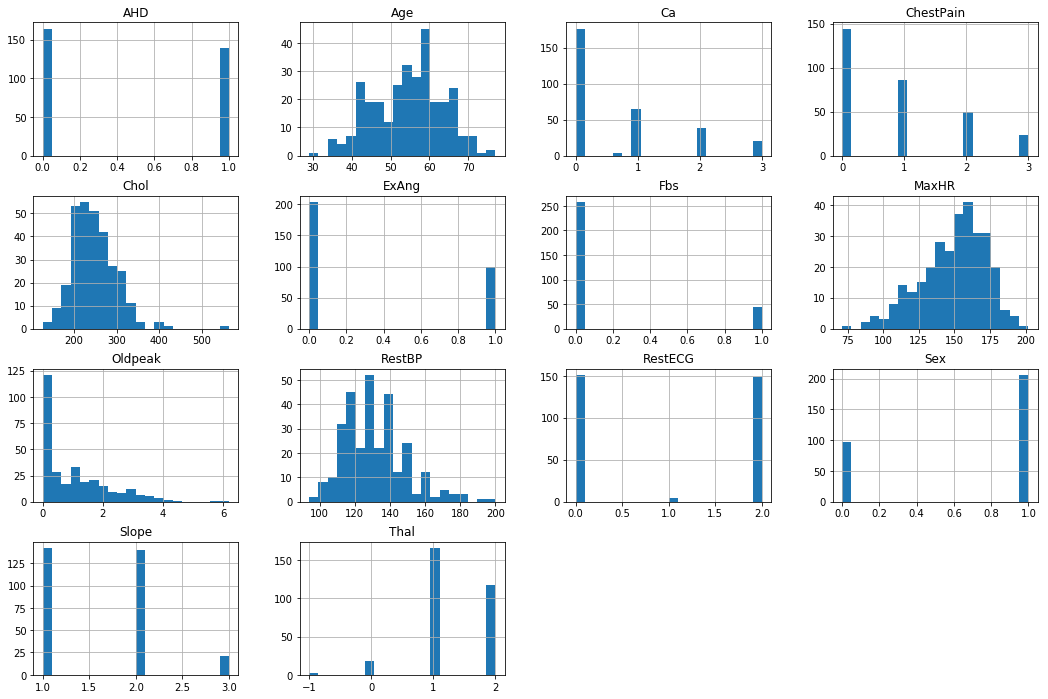

In [7]:
# Visualizing the Data
Hearts_data.hist(bins=20, figsize=(18, 12), xlabelsize=10)

In [8]:
#Defining functions
def preprocess_features(hearts_data):
    selected_features = (Hearts_data[['Age','Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
                                      'RestECG', 'MaxHR', 'ExAng','Oldpeak', 'Slope', 'Ca', 'Thal']])
    processed_features = selected_features.copy() 
    # Create a synthetic feature.
    
    return processed_features

def preprocess_targets(hearts_data):  
    selected_features =  (Hearts_data[['AHD']])
    return selected_features

def linear_scale(series):
    min_val = series.min()
    max_val = series.max()
    scale = (max_val - min_val) / 2.0
    return series.apply(lambda x:((x - min_val) / scale) - 1.0)


def log_normalize(series):
    return series.apply(lambda x:math.log(x+1.0))

def normalize_linear_scale(examples_dataframe):
    processed_features = pd.DataFrame()
    processed_features["Age"] = log_normalize(examples_dataframe["Age"])
    processed_features["Sex"] = linear_scale(examples_dataframe["Sex"])
    processed_features["ChestPain"] = linear_scale(examples_dataframe["ChestPain"])
    processed_features["RestBP"] = linear_scale(examples_dataframe["RestBP"])
    processed_features["Chol"] = log_normalize(examples_dataframe["Chol"])
    processed_features["Fbs"] = linear_scale(examples_dataframe["Fbs"])
    processed_features["RestECG"] = linear_scale(examples_dataframe["RestECG"])
    processed_features["MaxHR"] = log_normalize(examples_dataframe["MaxHR"])
    processed_features["ExAng"] = linear_scale(examples_dataframe["ExAng"])
    processed_features["Oldpeak"] = log_normalize(examples_dataframe["Oldpeak"])
    processed_features["Slope"] = linear_scale(examples_dataframe["Slope"])
    processed_features["Ca"] = linear_scale(examples_dataframe["Ca"])
    processed_features["Thal"] = linear_scale(examples_dataframe["Thal"])

    return processed_features

def construct_feature_columns(input_features):
    
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])


def input_fn(features, targets, num_epochs=None, shuffle=True):
  
   # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(10).repeat(num_epochs)  #batch_size
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(1000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


In [9]:
# randomizing the data
Hearts_data = Hearts_data.reindex(np.random.permutation(Hearts_data.index))

In [10]:
# train test and predict split
training_features = preprocess_features(Hearts_data)[:240] 
training_targets = preprocess_targets(Hearts_data)[:240] 
test_features = preprocess_features(Hearts_data)[241:] 
test_targets = preprocess_targets(Hearts_data)[241:]

In [11]:
# Check that we've done the right thing. 
print("Training examples summary:")
print(display.display(training_features.describe()))
print("Training targets summary:")
print(display.display(training_targets.describe()))

Training examples summary:


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,54.187500,0.700000,0.845833,131.137500,246.866667,0.150000,0.995833,149.725000,0.329167,1.015000,1.612500,0.636204,1.320833
std,9.173037,0.459215,0.949115,17.822282,51.010612,0.357818,0.995798,23.155094,0.470893,1.137688,0.630343,0.888481,0.614660
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.600000,2.000000,0.000000,1.000000
75%,61.000000,1.000000,1.000000,140.000000,274.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,2.000000


None
Training targets summary:


,AHD
count,240.000000
mean,0.466667
std,0.499930
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


None


In [12]:
#Normalize and scale the data
training_features = normalize_linear_scale(training_features)
test_features = normalize_linear_scale(test_features)

In [13]:
#Create input functions.
training_input_fn = lambda: input_fn(features= training_features, targets= training_targets)
test_input_fn= lambda: input_fn(features= test_features, targets= test_targets)
predict_training_input_fn = lambda: input_fn(training_features, training_targets, num_epochs=1, shuffle=False)
predict_test_input_fn = lambda: input_fn(test_features, test_targets ,num_epochs=1,shuffle=False)

In [14]:
#Specify optimizer and classifier
my_optimizer = tf.train.AdamOptimizer()
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
dnn_classifier = tf.estimator.DNNClassifier(feature_columns=construct_feature_columns(training_features),
                                                hidden_units=[10,10], optimizer=my_optimizer )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmpaeuzujo3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000CD402A73C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
train_score = []
test_score = []

for period in range(5):
    #Train the model
    dnn_classifier.train(input_fn=training_input_fn, steps = 100)
    #Get predictions
    training_predictions = dnn_classifier.predict(input_fn=predict_training_input_fn)
    test_predictions = dnn_classifier.predict(input_fn=predict_test_input_fn)
    pred_t = np.array([i['logistic'][0] for i in training_predictions])
    pred_t = (pred_t>0.5).astype(int)
    pred_v = np.array([i['logistic'][0] for i in test_predictions])
    pred_v = (pred_v>0.5).astype(int)
    
    #Add accuracy score from this period to our list 
    train_score.append(accuracy_score(pred_t, training_targets))
    test_score.append(accuracy_score(pred_v, test_targets))
    


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Hp\AppData\Local\Temp\tmpaeuzujo3\model.ckpt.
INFO:tensorflow:loss = 12.1236, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\Hp\AppData\Local\Temp\tmpaeuzujo3\model.ckpt.
INFO:tensorflow:Loss for final step: 6.76123.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpaeuzujo3\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\T

final training accuracy score 80.0 %
final test accuracy score 88.7096774194 %


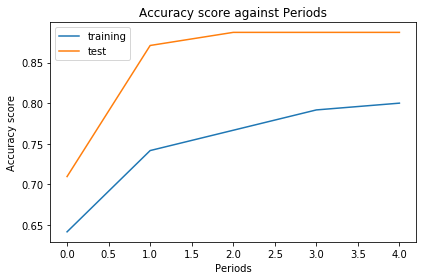

In [16]:
#Output a graph of loss metrics over periods.  
plt.ylabel("Accuracy score")  
plt.xlabel("Periods")
plt.title("Accuracy score against Periods")
plt.tight_layout()
plt.plot(train_score, label="training") 
plt.plot(test_score, label="test") 
plt.legend()  

print("final training accuracy score",accuracy_score(pred_t, training_targets)*100,"%")
print("final test accuracy score",accuracy_score(pred_v, test_targets)*100,"%")